In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='nypdf', src=FILE, fpath='./hce_data/nypdf/nypdf.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.008693456649780273] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "KY_CD": "numeric",
    "OFNS_DESC": "text",
    "PD_CD": "numeric",
    "PD_DESC": "text",
    "CRM_ATPT_CPTD_CD": "categorical",
    "LAW_CAT_CD": "categorical",
    "JURIS_DESC": "text",
    "BORO_NM": "categorical",
    "ADDR_PCT_CD": "numeric",
    "LOC_OF_OCCUR_DESC": "categorical",
    "PREM_TYP_DESC": "text",
    "PARKS_NM": "text",
    "HADEVELOPT": "text",
    "X_COORD_CD": "numeric",
    "Y_COORD_CD": "numeric",
    "Latitude": "numeric",
    "Longitude": "numeric"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'KY_CD': ['equal'], 'OFNS_

In [4]:
pf.session.load_embedding(save=True, path='./hce_data/nypdf/', load=True)

INFO:profiler.utility:[0.4915916919708252] Load Embedding start

INFO:profiler.utility:[0.5540695190429688] Load Embedding execution time: 0.062477827072143555



In [5]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.5602536201477051] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 1 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 1, and the bound is 0.00035023
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 17/17 [00:00<00:00, 17.08it/s]
INFO:profiler.data.transformer:Number of training samples: 584494
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[497.12514448165894] Create Training Data execution time: 496.56489086151123



In [6]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[497.1909394264221] Learn Structure start

INFO:profiler.learner:use threshold 0.6362
INFO:profiler.utility:[498.80587935447693] Learn Structure execution time: 1.6149399280548096



In [7]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[498.81267189979553] Get Dependencies start



LOC_OF_OCCUR_DESC -> X_COORD_CD (0.00010606206125262289)
LOC_OF_OCCUR_DESC,X_COORD_CD -> KY_CD (0.08379292087726)
LOC_OF_OCCUR_DESC,X_COORD_CD -> Y_COORD_CD (2.560782487957893e-05)
LOC_OF_OCCUR_DESC -> OFNS_DESC (0.0006650900037094674)
X_COORD_CD -> PD_DESC (3.0794919530721176e-05)
LOC_OF_OCCUR_DESC,KY_CD -> JURIS_DESC (0.00015053180198927092)
X_COORD_CD,Y_COORD_CD -> PARKS_NM (5.816658985345463e-05)
HADEVELOPT,LOC_OF_OCCUR_DESC,X_COORD_CD,KY_CD,Y_COORD_CD,OFNS_DESC,PD_DESC,JURIS_DESC,PREM_TYP_DESC,PARKS_NM -> Latitude (6.3715022284220595e-06)
Latitude -> Longitude (1.710878623047318e-06)
X_COORD_CD,Y_COORD_CD,JURIS_DESC,PREM_TYP_DESC,Latitude -> ADDR_PCT_CD (0.014184889995647435)
X_COORD_CD,Longitude,ADDR_PCT_CD -> BORO_NM (0.1722174638103417)
HADEVELOPT,X_COORD_CD,PARKS_NM,Latitude,Longitude -> CRM_ATPT_CPTD_CD (0.033381820822329156)
KY_CD,OFNS_DESC,PD_DESC,PARKS_NM,Longitude -> LAW_CAT_CD (0.21190962594745003)

INFO:profiler.utility:[499.4582965373993] Get Dependencies execution time: 0.6456246376037598




LOC_OF_OCCUR_DESC,X_COORD_CD,KY_CD,JURIS_DESC,PREM_TYP_DESC,Latitude -> PD_CD (0.021745847591300382)


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


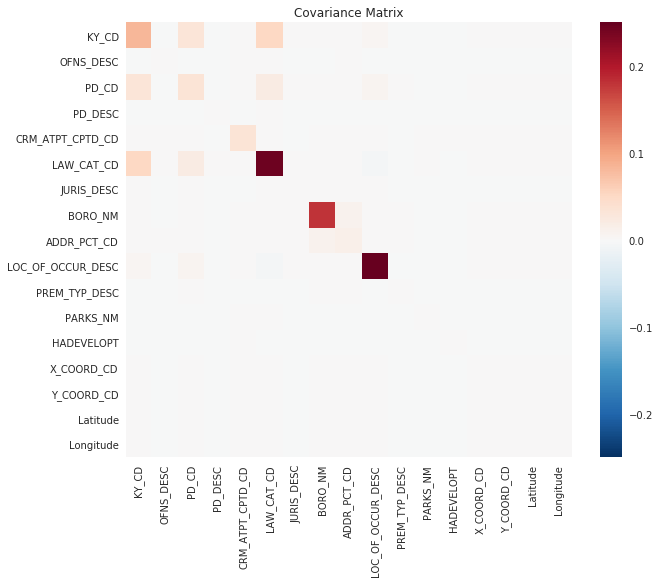

In [8]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


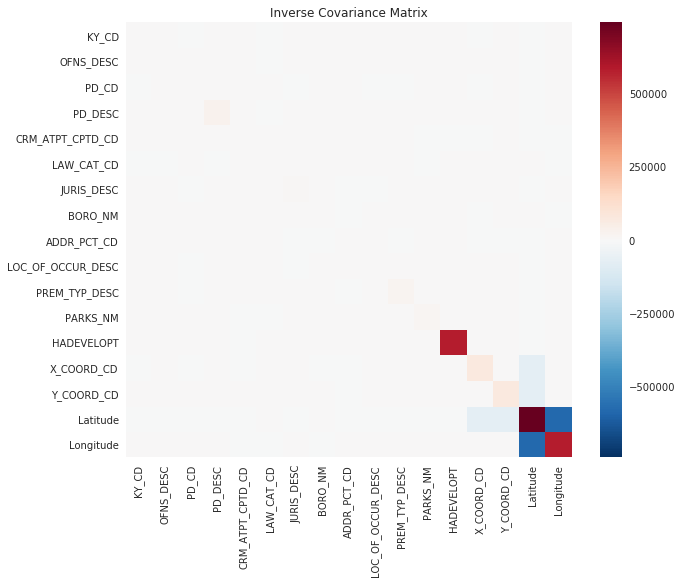

threshold =  34
sum =  [3.77304463e+01 2.29566595e+01 2.47158866e+01 2.90607555e+01
 1.39034349e+01 1.78969843e+01 1.36649960e+01 1.78502321e+01
 8.41968531e+01 1.15153832e+01 1.61106725e+01 2.01011993e+01
 1.24067488e+01 7.30866879e+04 7.30874808e+04 7.30693769e+05
 5.84534163e+05]
attr =  Index(['KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD',
       'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM', 'ADDR_PCT_CD',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM', 'HADEVELOPT',
       'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude'],
      dtype='object')
Attr w/o dependency: 
 Index([['OFNS_DESC'], ['PD_CD'], ['PD_DESC'], ['CRM_ATPT_CPTD_CD'],
       ['LAW_CAT_CD'], ['JURIS_DESC'], ['BORO_NM'], ['LOC_OF_OCCUR_DESC'],
       ['PREM_TYP_DESC'], ['PARKS_NM'], ['HADEVELOPT']],
      dtype='object')


Attr w/ dependency: 
 Index([['KY_CD'], ['ADDR_PCT_CD'], ['X_COORD_CD'], ['Y_COORD_CD'],
       ['Latitude'], ['Longitude']],
      dtype='object')


In [9]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


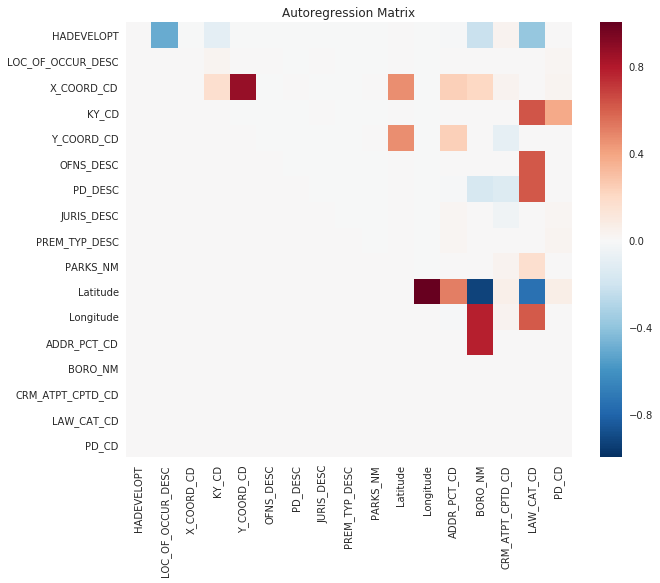

In [10]:
pf.session.visualize_autoregression()

In [11]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.008693,start: Load Data,0.000000
1,0.486409,end: Load Data,0.477716
2,0.491592,start: Load Embedding,0.000000
3,0.554070,end: Load Embedding,0.062478
4,0.560254,start: Create Training Data,0.000000
5,497.125144,end: Create Training Data,496.564891
6,497.190939,start: Learn Structure,0.000000
7,498.805879,end: Learn Structure,1.614940
8,498.812672,start: Get Dependencies,0.000000
9,499.458297,end: Get Dependencies,0.645625


In [12]:
pf.session.timer.to_csv()